Name: Sumanasekara W.K.G.G.

Index: 190610E

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

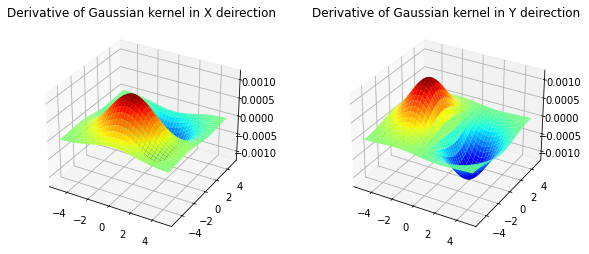

In [2]:
# Derivatives of Gaussian filter

step, sigma = 0.1, 2

X, Y = np.arange(-5, 5+step, step), np.arange(-5, 5+step, step)
XX, YY = np.meshgrid(X, Y)
gaussian = np.exp(-(XX**2 + YY**2)/(2*sigma**2)) / (2*np.pi*sigma**2)
d_gaussian = np.array(np.gradient(gaussian))

fig = plt.figure(figsize=plt.figaspect(0.4))

ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(XX, YY, d_gaussian[0], cmap=cm.jet)
ax.set_title("Derivative of Gaussian kernel in X deirection")
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(XX, YY, d_gaussian[1], cmap=cm.jet)
ax.set_title("Derivative of Gaussian kernel in Y deirection")
plt.show()

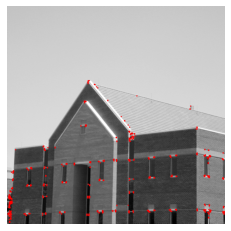

In [10]:
# Harris corner detection

img = cv.imread(r"building.tif")
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY).astype(np.float32)
corners = cv.cornerHarris(gray_img, 2, 5, 0.07)
corners = cv.dilate(corners, None)
img[corners > 0.01 * corners.max()]=[0, 0, 255]
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

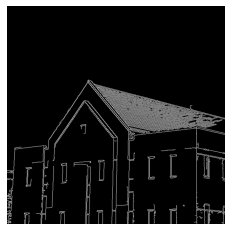

In [18]:
# Canny edge detection

canny = cv.Canny(gray_img.astype(np.uint8), 100, 200)

plt.imshow(canny, cmap='gray')
plt.axis('off')
plt.show()